In [1]:
# Simple CNN model for CIFAR-10
import numpy
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('tf')

Using TensorFlow backend.


In [2]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [3]:
# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [4]:
print(X_train.shape)

(50000, 32, 32, 3)


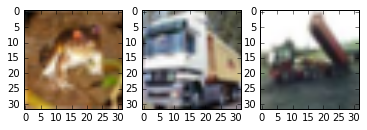

In [5]:
from matplotlib import pyplot as plt
%matplotlib inline
#plt.imshow(X_train[0])
plt.subplot(131)
plt.imshow(X_train[0])
plt.subplot(132)
plt.imshow(X_train[1])
plt.subplot(133)
plt.imshow(X_train[2])
# show the plot
plt.show()

In [6]:
# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

In [7]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [8]:
print(num_classes)

10


In [9]:
# Create the model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile model
epochs = 10
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               3211776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
__________

In [10]:
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 46s - loss: 1.6986 - acc: 0.3873 - val_loss: 1.3541 - val_acc: 0.5128
Epoch 2/10
50000/50000 [==============================] - 45s - loss: 1.3244 - acc: 0.5249 - val_loss: 1.2040 - val_acc: 0.5778
Epoch 3/10
50000/50000 [==============================] - 45s - loss: 1.1789 - acc: 0.5814 - val_loss: 1.1225 - val_acc: 0.6003
Epoch 4/10
50000/50000 [==============================] - 45s - loss: 1.0807 - acc: 0.6164 - val_loss: 1.0773 - val_acc: 0.6218
Epoch 5/10
50000/50000 [==============================] - 45s - loss: 1.0049 - acc: 0.6438 - val_loss: 1.0312 - val_acc: 0.6330
Epoch 6/10
50000/50000 [==============================] - 45s - loss: 0.9485 - acc: 0.6655 - val_loss: 0.9981 - val_acc: 0.6467
Epoch 7/10
50000/50000 [==============================] - 45s - loss: 0.8976 - acc: 0.6845 - val_loss: 0.9682 - val_acc: 0.6575
Epoch 8/10
50000/50000 [==============================